In [42]:
import pandas as pd
import numpy as np
import os

import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('../dataset/Regular_Season_Batter.csv')
data2 = pd.read_csv('../dataset/Regular_Season_Batter_Day_by_Day.csv')
data3 = pd.read_csv('../dataset/Pre_Season_Batter.csv')
data4 = pd.read_csv('../dataset/submission.csv')

In [3]:
print('data1.shape: ',data1.shape)
print('data2.shape: ',data2.shape)
print('data3.shape: ',data3.shape)
print('data4.shape: ',data4.shape)

data1.shape:  (2454, 29)
data2.shape:  (109771, 20)
data3.shape:  (1393, 29)
data4.shape:  (220, 2)


## 범주형자료
- year
    - 시즌별 중간에 쉰 횟수 (부상의 가능성이 있을 수 있다.)
- team
- position


## 연속형자료
- 나머지

# train set, validation set, test set
- train set
    - 1995~2017년까지의 data
- validation set
    - 2018년까지의 data
- test set
    - 2019년 선수별 성적

# OPS ( OBP + SLG )
## OBP
- https://ko.wikipedia.org/wiki/%EC%B6%9C%EB%A3%A8%EC%9C%A8
- 여기서 데이터에 없는건 희생플라이(SF)

## SLG
- https://ko.wikipedia.org/wiki/%EC%9E%A5%ED%83%80%EC%9C%A8

# Regular_Season_Batter

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
batter_id          2454 non-null int64
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non

In [5]:
data1.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


## Year

In [6]:
data1.year.unique()

array([2018, 2011, 2014, 2015, 2016, 2017, 2013, 2005, 2006, 2007, 2008,
       2012, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2009, 2010,
       1996, 1993, 1994, 1995], dtype=int64)

## 아이디별 평균 OPS 

In [7]:
mean_ops_by_id = data1.groupby('batter_id').mean()['OPS']

In [8]:
mean_ops_by_id[mean_ops_by_id.isnull() == True]
data1[data1.batter_id==305]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
2215,305,최민구,2015,삼성,NaN,6,0,1,0,0,...,0,NaN,NaN,0,NaN,1992년 03월 17일,NaN,칠성초-대구중-대구상원고-영남대,NaN,NaN


In [9]:
mean_ops_by_id = mean_ops_by_id.fillna(0)

In [10]:
mean_ops_by_id.describe()

count    345.000000
mean       0.615126
std        0.193352
min        0.000000
25%        0.506600
50%        0.625736
75%        0.737400
max        1.173719
Name: OPS, dtype: float64

C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


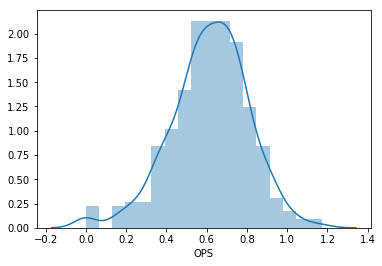

In [11]:
sns.distplot(mean_ops_by_id)

## 시즌 참가 횟수

In [12]:
pd.Series(data1.batter_id.value_counts()).describe()

count    345.000000
mean       7.113043
std        4.999009
min        1.000000
25%        3.000000
50%        6.000000
75%       11.000000
max       20.000000
Name: batter_id, dtype: float64

C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


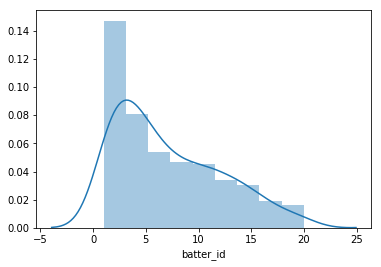

In [13]:
sns.distplot(data1.batter_id.value_counts())

## Team

In [14]:
data1.team.unique()

array(['LG', '한화', 'NC', 'OB', '삼성', '롯데', 'KT', '현대', '우리', '히어로즈', '넥센',
       '두산', 'SK', 'KIA', '해태', '쌍방울'], dtype=object)

In [26]:
team_df = data1.groupby(['team','batter_name']).count()['batter_id'].reset_index()
batter_by_team = team_df.groupby('team').count().reset_index().sort_values(by='batter_id')
batter_by_team.describe()

,batter_name,batter_id
count,16.000000,16.000000
mean,34.875000,34.875000
std,22.916879,22.916879
min,1.000000,1.000000
25%,13.000000,13.000000
50%,43.500000,43.500000
75%,53.250000,53.250000
max,64.000000,64.000000


In [28]:
batter_by_team

,team,batter_name,batter_id
10,쌍방울,1,1
4,OB,2,2
13,해태,3,3
11,우리,13,13
15,히어로즈,13,13
14,현대,15,15
1,KT,36,36
3,NC,40,40
5,SK,47,47
6,넥센,49,49


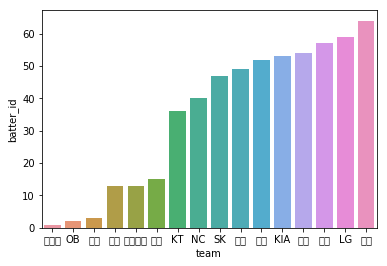

In [29]:
sns.barplot(x='team',y='batter_id',data=batter_by_team)

In [33]:
con_df_mean = data1.groupby('batter_id').mean().reset_index()
con_df_mean.describe()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,345.000000,345.000000,344.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,...,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,344.000000,344.000000,345.000000,344.000000
mean,172.000000,2013.434194,0.226043,61.929316,164.917701,25.371223,45.646600,8.286882,0.822853,4.846585,...,4.270717,1.896223,16.491571,2.792703,33.673173,3.545309,0.325933,0.291806,3.130870,0.616914
std,99.737155,3.193981,0.070725,35.284855,138.061920,24.393928,42.453911,8.349866,1.147987,7.228496,...,6.212515,2.217842,16.551253,2.925591,27.087792,3.310275,0.120263,0.079511,3.473970,0.190756
min,0.000000,2002.562500,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,2011.272727,0.184450,32.600000,44.428571,6.000000,9.166667,1.500000,0.000000,0.333333,...,0.400000,0.250000,3.454545,0.500000,11.500000,1.000000,0.255875,0.252000,0.727273,0.507275
50%,172.000000,2014.000000,0.233000,60.800000,129.000000,18.333333,33.500000,5.600000,0.500000,2.000000,...,1.666667,1.071429,11.555556,2.000000,28.000000,2.625000,0.324972,0.303750,1.909091,0.626243
75%,258.000000,2016.000000,0.276292,89.833333,244.833333,35.571429,67.400000,12.705882,1.125000,6.058824,...,5.333333,2.722222,23.600000,4.000000,47.750000,5.500000,0.402063,0.344239,4.200000,0.738300
max,344.000000,2018.000000,0.500000,142.000000,535.000000,122.000000,171.000000,47.000000,8.250000,41.333333,...,37.333333,11.062500,94.500000,16.142857,139.000000,15.500000,0.767000,0.500000,25.000000,1.173719


In [ ]:
sns.co

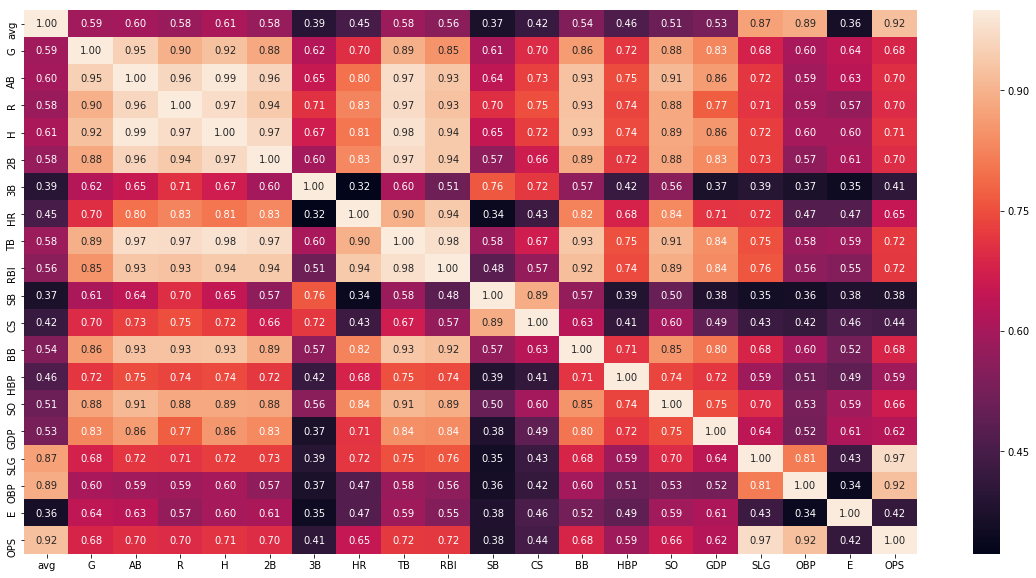

In [39]:
f, ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(con_df.iloc[:,2:].corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

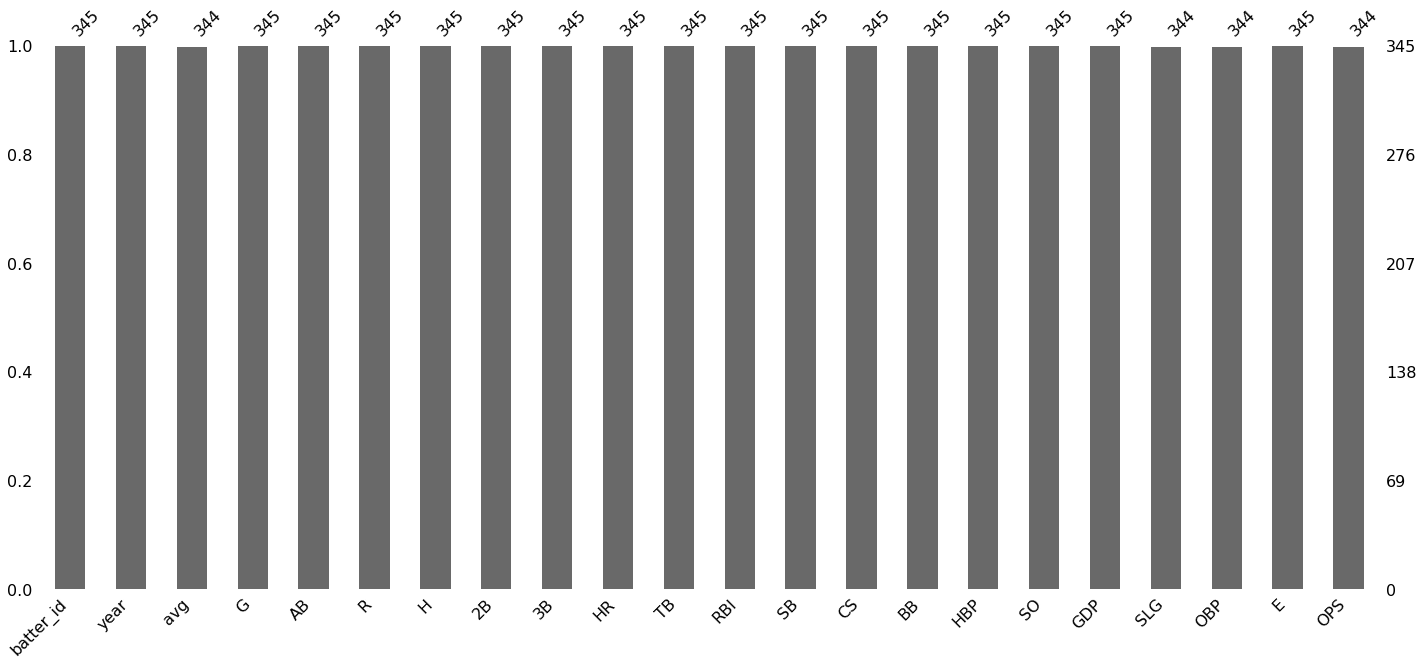

In [43]:
ms.bar(con_df_mean)

In [45]:
con_df_mean = con_df_mean.fillna(0)

C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


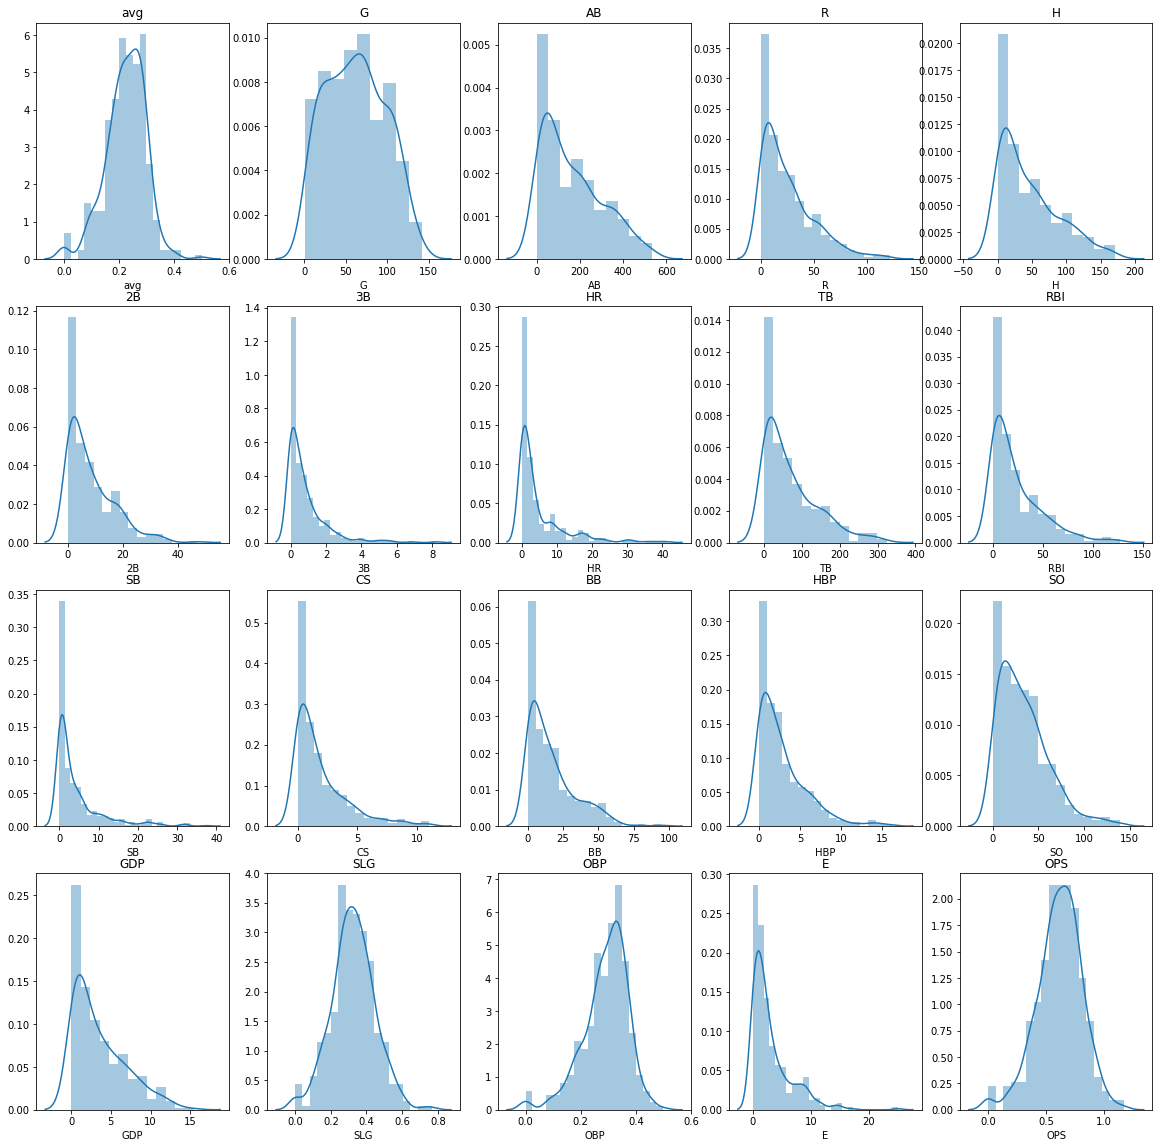

In [52]:
f, ax = plt.subplots(4,5, figsize=(20,20))
for i in range(4*5):
    sns.distplot(con_df_mean.iloc[:,i+2], ax=ax[i//5, i%5])
    ax[i//5, i%5].set_title(con_df_mean.columns[i+2])

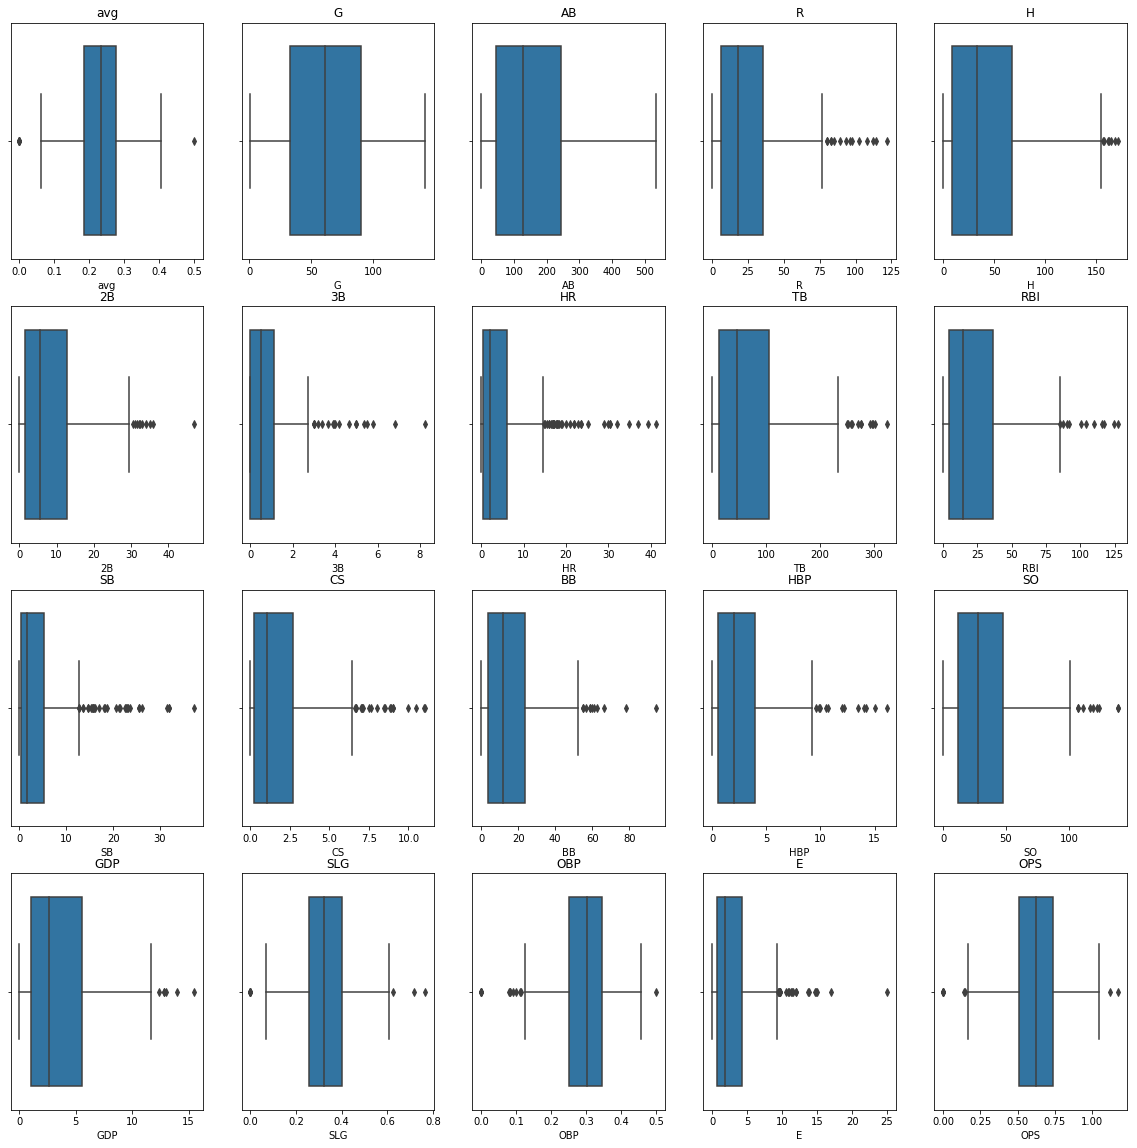

In [79]:
f, ax = plt.subplots(4,5, figsize=(20,20))
for i in range(4*5):
    sns.boxplot(con_df_mean.iloc[:,i+2], ax=ax[i//5, i%5])
    ax[i//5, i%5].set_title(con_df_mean.columns[i+2])